# 지도학습 (4) - 회귀모델 성능 측정 지표
- 회귀분석을 통해 `예측 모델을 만들고` 해당 모델의 `성능을 파악`하기 위해 제동되는 사이킷런의 성능 측정 지표 모듈
## 1. 작업 준비

In [3]:
import sys
sys.path.append('../../')
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as pyplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 성능 측정 지표 모듈
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

## 2. 자동차 속도에 따른 제동거리 회귀 모델
### 데이터 가져오기

In [4]:
origin = read_excel('https://data.hossam.kr/E04/cars.xlsx')
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### 독립변수에 대한 다항식 생성

In [5]:
poly = PolynomialFeatures(include_bias=False)
my_fit = poly.fit_transform(origin[['speed']])
x = DataFrame(my_fit, columns = poly.get_feature_names_out())
x.head()

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


### 종속변수 추출

In [6]:
y = origin[['dist']]
y.head()

,dist
0,2
1,10
2,4
3,22
4,16


### 데이터 분할
- `.shape` returns a tuple with each index having the number of corresponding elements    
    - returns (number of index, number of columns)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 2)
(15, 2)
(35, 1)
(15, 1)


In [8]:
model = LinearRegression()
my_fit = model.fit(x_train, y_train)

print('계수: ', my_fit.coef_)
print('절편: ', my_fit.intercept_)
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))

계수:  [[0.73773403 0.09986278]]
절편:  [4.70067321]
훈련 데이터 설명력:  0.5941347702404498
검증 데이터 설명력:  0.8183504037854948


### 예측값 생성
#### 훈련 데이터에 대한 예측값

In [9]:
y_train_pred = my_fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([ 9.24941376, 22.06429118, 42.06928848, 85.55825922, 38.23580838,
       50.33542533, 31.16802484, 54.76808209, 42.06928848, 22.06429118,
       34.60205383, 79.92724915, 14.75808748, 38.23580838, 74.49596463,
       16.99376316, 31.16802484, 54.76808209, 27.9337214 , 69.26440567,
       38.23580838, 54.76808209, 59.40046439, 24.89914351, 50.33542533,
       50.33542533, 34.60205383, 59.40046439, 34.60205383, 31.16802484,
       59.40046439, 50.33542533, 46.10249413, 14.75808748, 79.92724915])

#### 검증 데이터에 대한 예측값

In [10]:
y_test_pred = my_fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([24.89914351, 27.9337214 , 46.10249413, 79.92724915, 31.16802484,
        9.24941376, 59.40046439, 27.9337214 , 46.10249413, 22.06429118,
       34.60205383, 79.92724915, 27.9337214 , 59.40046439, 19.42916439])

## 3. 회귀분석 모델의 성능 평가
- 회귀분석 모델의 평가를 위한 지표는 `실제값(관측치)과 회귀 예측값의 차이`를 기반으로 함

|구분|설명|
|--|--|
|설명력|높을수록 좋음 (1에 가까울수록)|
|에러율|낮을수록 좋음 (0에 가까울수록)|

### 1) 설명력
- $R^2$ (결정계수)
    - 회귀분석에서 가장 많이 채택되는 설명력 값
    - 기본적으로 모델의 학습 결과를 갖고 있는 `fit` 객체의 `.score(독립변수, 종속변수)` 메서드를 통해 조회 가능
    - sklearn이 제공하는 `metrics` 객체의 `.r2_score(독립변수, 예측값)` 메서드를 통해서도 조회 가능
        - 이 때, 파라미터는 관측치와 예측치를 전달 (fit의 .score()의 파라미터와 다름)
        - 그러나 설명력 값은 동일하게 나옴

In [11]:
print('훈련 데이터 설명력: ', my_fit.score(x_train, y_train))
print('검증 데이터 설명력: ', my_fit.score(x_test, y_test))
print('훈련 데이터 설명력: ', r2_score(y_train, y_train_pred))
print('검증 데이터 설명력: ', r2_score(y_test, y_test_pred))

훈련 데이터 설명력:  0.5941347702404498
검증 데이터 설명력:  0.8183504037854948
훈련 데이터 설명력:  0.5941347702404498
검증 데이터 설명력:  0.8183504037854948


### 2) 에러율

- `절대적인 기준은 없고` 값이 `0에 가까울수록` 좋으나 암만 못해도 `20~30% 이하`는 나와야 에러율이 낮다고 판단할 수 있다
- `교차 검증이 필요`하다
    - 교차 검증 한 후 에러율이 가장 낮은 것으로 사용한다
    - `검증 데이터`와 `훈련/학습 데이터`를 `1대3 (0.25:0.75)`으로 나눠서,
        - 첫번째) 검증데이터(x)를 앞에 0.25의 비율, 훈련데이터(o)를 뒤에 0.75의 비율로 에러율 검증: xooo
        - 두번째) 훈련데이터(o) 앞 0.25, 검증데이터(x) 중간 0.25, 훈련데이터(o) 뒤 0.50의 비율로 에러율 검증: oxoo
        - 세번째) 훈련데이터(o) 앞 0.50, 검증데이터(x) 중간 0.25, 훈련데이터(o) 뒤 0.25의 비율로 에러율 검증: ooxo
        - 네번째) 훈련데이터(o) 앞 0.75, 검증데이터(x) 뒤 0.25의 비율로 에러율 검증: ooox

|종류|이름|한글명|잔차계산|이상치에 영향 여부|
|--|--|--|--|--|
|MAE|Mean Absolute Error|평균절대오차|절대값|Yes|
|MSE|Mean Squared Error|평균제곱오차|제곱값|No|
|RMSE|Root Mean Squared Error|평균오차|제곱값|No|
|MAPE|Mean Absolute Percentage Error|평균절대백분오차 비율|절대값|Yes|
|MPE|Mean Percentage Error|평균비율오차|N/A|Yes|

#### $MAE$ (Mean Absolute Error, 평균절대오차)
- `mean_absolute_error()`

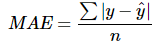

In [12]:
from IPython.display import Image, display
display(Image(filename='mae_expr.png'))

- 모델의 예측값과 실제값의 차이를 모두 더하는 개념
- 이상치에 영향을 받지 않음
- 절대값을 취하기 때문에 
    - 직관적으로 알 수 있는 지표
    - 실제보다 낮은 값(underperformance)인지 큰 값(overperformance)인지 알 수 없다 (양성인지 음성인지 알 수 없다는 뜻)

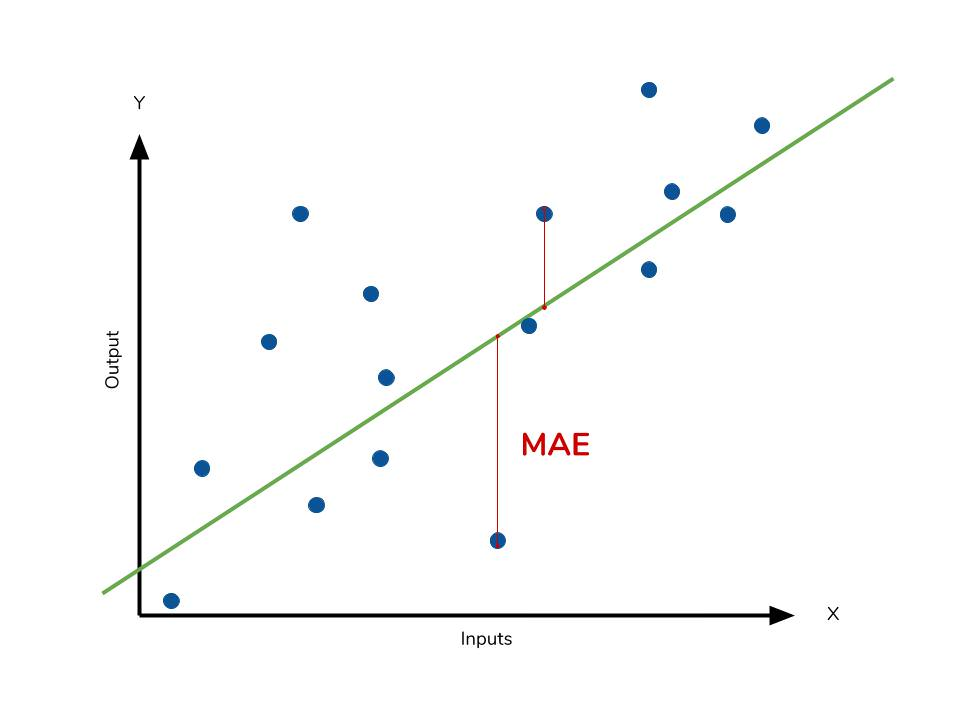

In [13]:
from IPython.display import Image, display
display(Image(filename = 'mae.jpg'))

In [14]:
print('훈련 데이터 MAE: ', mean_absolute_error(y_train, y_train_pred))
print('검증 데이터 MAE: ', mean_absolute_error(y_test, y_test_pred))

훈련 데이터 MAE:  11.60665421831887
검증 데이터 MAE:  9.579510632066915


#### $MSE$ (Mean Squared Error, 평균 제곱 오타)
- `mean_squared_error()`

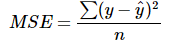

In [15]:
from IPython.display import Image, display
display(Image(filename = 'mse_expr.png'))

- MAE와는 다르게 제곱을 하기에 모델의 `실제값과 예측값의 차이의 면적의 합`이다
- 제곱을 하기에 특이값이 존재하면 수치가 많이 늘어난다 (특이치, 이상치에 민감함)
- 실제로 잘 안쓰고 이것보단 이 값에 루트를 씌운 RMSE를 더 많이 사용함

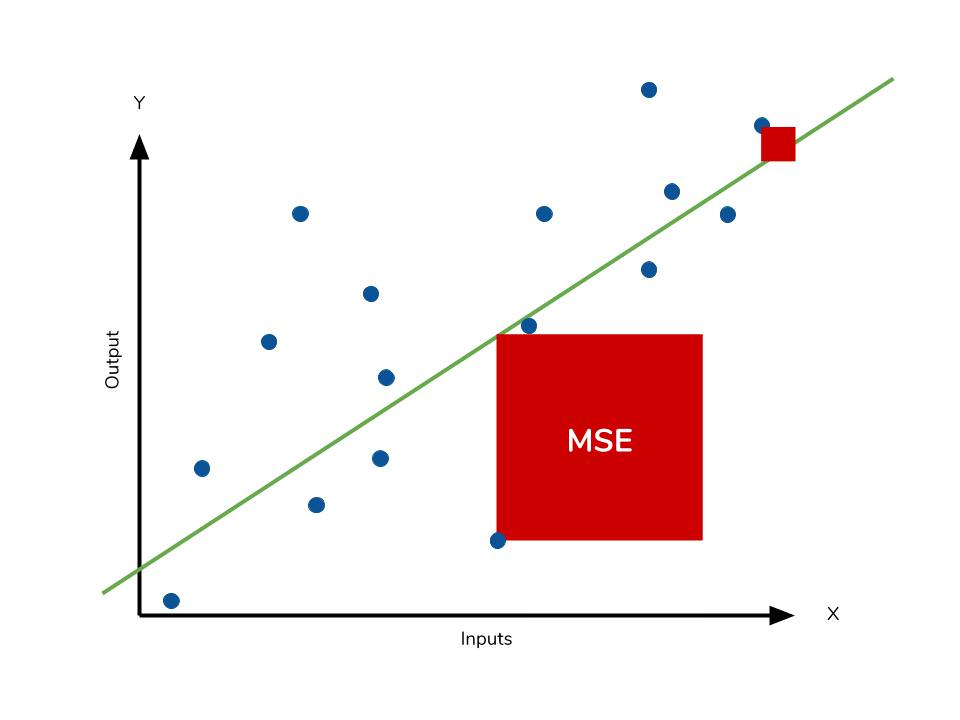

In [16]:
from IPython.display import Image, display
display(Image(filename = 'mse.jpg'))

In [17]:
print('훈련 데이터 MSE: ', mean_squared_error(y_train, y_train_pred))
print('검증 데이터 MSE: ', mean_squared_error(y_test, y_test_pred))

훈련 데이터 MSE:  257.5491533817692
검증 데이터 MSE:  124.43723939078464


#### $RMSE$ (Root Mean Squared Error, 평균 오차)
- `numply.sqrt(mean_squared_error())`

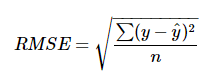

In [18]:
from IPython.display import display, Image
display(Image(filename='rmse_expr.png'))

- MSE를 구한 값에 루트를 씌움
- 오류 지표를 실제 값과 유사한 단위로 변환하여 해석을 쉽게 함

In [19]:
print("훈련 데이터 RMSE: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("검증 데이터 RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

훈련 데이터 RMSE:  16.048338025533024
검증 데이터 RMSE:  11.15514407754488


#### $MAPE$ (Mean Absolute Percentage Error, 평균 절대 백분오차 비율)
- `numpy.mean(numpy.abs())`

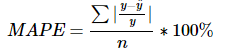

In [20]:
from IPython.display import display, Image
display(Image(filename = 'mape_expr.png'))

- MAE를 퍼센트로 변환한 것
- MAE와 동일하게
    - MSE보다 이상치에 민감
    - 실제값보다 낮은 값인지 높은 값인지 알 수 없음
- 모델에 대한 편향이 있음 (이를 대응하기 위해 MPE도 추가로 확인하는 것 추천)

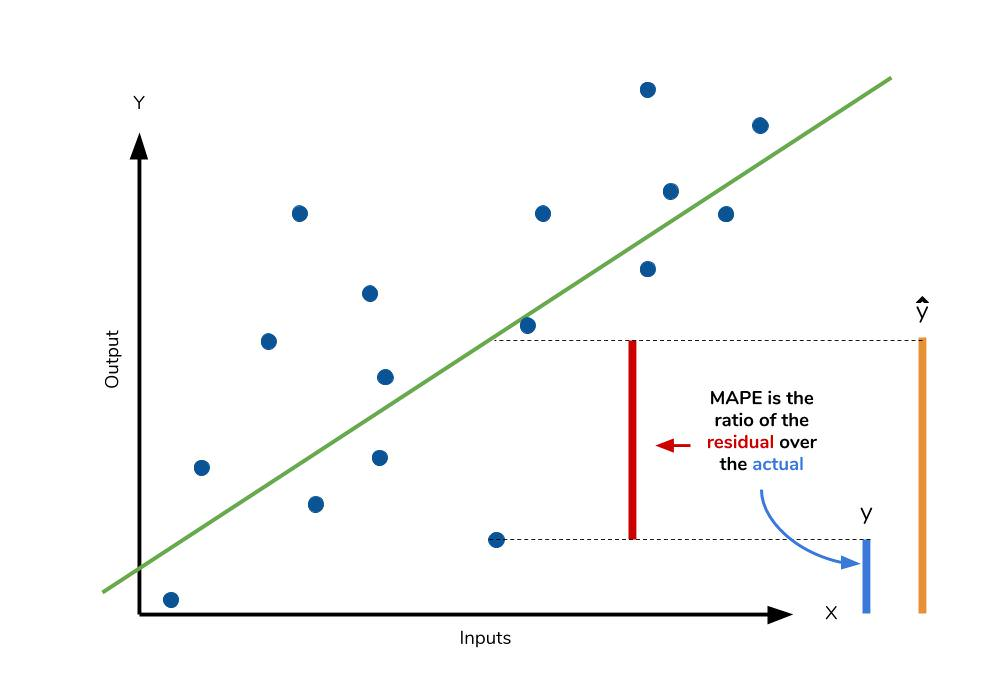

In [21]:
from IPython.display import display, Image
display(Image(filename = 'mape.jpg'))

In [22]:
# API로 제공되는 기능이 아니고 직접 계산해야 하기 때문에 관측치와 예측치의 데이터타입이 동일해야 함
# -> numpy 배열 혹은 Series 타입으로 통일해야 함
# 그냥 y_train 으로 한 것이 아니라 y_train.values로 하여 numpy 배열로 변환
print('훈련 데이터 MAPE: ', np.mean(np.abs((y_train.values - y_train_pred) / y_train.values)) * 100)
print('검증 데이터 MAPE: ', np.mean(np.abs((y_test.values - y_test_pred) / y_test.values)) * 100)

훈련 데이터 MAPE:  98.62187448277136
검증 데이터 MAPE:  202.18312156089843


#### $MPE$ (Mean Percentage Error, 평균 비율 오차)
- `numpy.mean()`

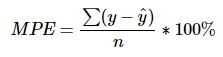

In [23]:
from IPython.display import display, Image
display(Image(filename = 'mpe_expr.png'))

- MAPE와 비슷하지만 `MAPE에서 절대값을 제외한 지표`
- 장점: 모델이 실제값보다 낮은 값인지 큰 값인지 판단 가능

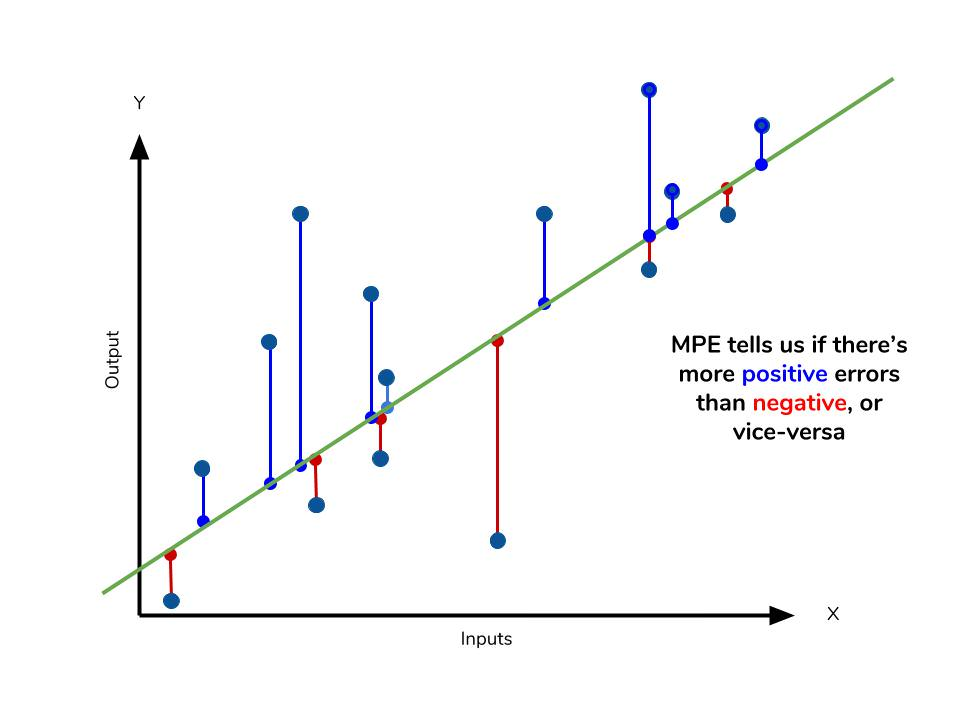

In [24]:
from IPython.display import display, Image
display(Image(filename = 'mpe.jpg'))

In [25]:
# API로 제공되는 기능이 아니고 직접 계산해야 하기 때문에 관측치와 예측치의 데이터타입이 동일해야 함
# -> numpy 배열 혹은 Series 타입으로 통일해야 함
# 그냥 y_train 으로 한 것이 아니라 y_train.values로 하여 numpy 배열로 변환
print('훈련 데이터 MPE: ', np.mean((y_train.values - y_train_pred) / y_train.values) * 100)
print('검증 데이터 MPE: ', np.mean((y_test.values - y_test_pred) / y_test.values) * 100)

훈련 데이터 MPE:  -60.125435326146004
검증 데이터 MPE:  -157.06332774885408


## 4. 머신러닝 회귀분석 모듈 테스트
### 회귀분석 수행

In [26]:
olsResult = helper.ml_ols(origin, 
                          xnames = 'speed',
                          yname = 'dist',
                          degree = 2,
                          test_size = 0.3,      # 7:3으로 분할; test_size = 0이면 분할 안 함
                          random_state = 123)
print('계수: ', olsResult.coef)
print('절편: ', olsResult.intercept)

계수:  [[0.73773403 0.09986278]]
절편:  [4.70067321]


### 훈련데이터에 대한 평가 지표

In [27]:
print('R^2: ', olsResult.trainRegMetric.r2)
print('MAE: ', olsResult.trainRegMetric.mae)
print('MSE: ', olsResult.trainRegMetric.mse)
print('RMSE: ', olsResult.trainRegMetric.rmse)
print('MAPE: ', olsResult.trainRegMetric.mape)
print('MPE: ', olsResult.trainRegMetric.mpe)

R^2:  0.5941347702404498
MAE:  11.60665421831887
MSE:  257.5491533817692
RMSE:  16.048338025533024
MAPE:  33.73025758680721
MPE:  -16.22850108764368


### 검증데이터에 대한 평가 지표

In [28]:
print('R^2: ', olsResult.testRegMetric.r2)
print('MAE: ', olsResult.testRegMetric.mae)
print('MSE: ', olsResult.testRegMetric.mse)
print('RMSE: ', olsResult.testRegMetric.rmse)
print('MAPE: ', olsResult.testRegMetric.mape)
print('MPE: ', olsResult.testRegMetric.mpe)

R^2:  0.8183504037854948
MAE:  9.579510632066915
MSE:  124.43723939078464
RMSE:  11.15514407754488
MAPE:  53.575687880029236
MPE:  -32.81206970634045
